# **Data Handling and Exploration**
---

## Introduction

You will apply different data exploration, cleaning, and visualization techniques. It is very important to take some time to understand the data. 


## **About the data** 
---
The data set consists of 116,658 observations and 10 columns. It contains data of fifth-grade students, including their Math final exam grade.

* Student ID: identifies uniquely every student. **Note that no two students have the same ID.** 
* Gender
* School group: **There are only three groups school groups (A, B and C)**
* Effort regulation (effort)
* Family stress-level (stress)
* Help-seeking behavior (feedback)
* Regularity patterns of a student throughout the course (regularity)
* Critical-thinking skills (critical)
* Duration in minutes to solve final Math exam (minutes). **Should be numerical.**
* Final Math exam grade (grade) 


**The data set is available in the folder data**

In [1]:
import requests

exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)

npt_config = {
    'session_name': 'lab-02',
    'session_owner': 'mlbd',
    'sender_name': input("Your name: "),
}

In [1]:
# Your libraries here
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **0 Load the data**
---

In [ ]:
### 0.1
# YOUR CODE HERE
DATA_DIR = "./../../data"
df = pd.read_csv('{}/school_performance.csv'.format(DATA_DIR))

: 

In [20]:
# Let's see how the dataframe looks like
print("length of the dataframe:", len(df))
print("first rows of the dataframe:\n")
# send(len(df), 1) 
df.head()

length of the dataframe: 116658
first rows of the dataframe:



,student_id,gender,school_group,effort,stress,feedback,regularity,critical,minutes,grade
0,20404.0,male,99,5.997184,7.692678,24.722538,99.000000,2.01733,20.0,99.00
1,26683.0,female,99,6.017588,8.848776,99.000000,99.000000,99.00000,30.0,3.93
2,32954.0,99,99,6.070632,6.704850,24.448975,7.218109,99.00000,99,3.67
3,42595.0,99,99,5.996371,99.000000,99.000000,5.578566,1.02639,21.0,99.00
4,28603.0,male,99,99.000000,6.780604,99.000000,99.000000,99.00000,99,2.86


<a id="section1"></a>
## **1 Data Exploration** 
---

As mentioned in class, it is good practice to report the percentage of missing values per feature together with the features' descriptive statistics. 

In order to understand the data better, in this exercise, you should:

1. Create a function that takes as input a DataFrame and returns a DataFrame with meaningful descriptive statistics and the percentage of missing values for numerical and categorical (object type) features. The process of data cleaning requires multiple iterations of data exploration. This function should be helpful for the later data cleaning exercises. 

2. Justify the choice of each descriptive statistic. What does each say about the data? Can you identify some irregularities? 

3. In a single figure, choose an appropriate type of graph for each feature and plot each feature individually.  

4. Explain your observations. How are the features distributed (poisson, exponential, gaussian, etc)? Can you visually identify any outliers?



### 1.1 
Create a function that takes as input a DataFrame and returns meaningful descriptive statistics and the percentage of missing values for numerical and categorical (object type) features.



In [21]:
### 1.1
def get_feature_stats(df):
    """
    Obtains descriptive statistics for all features and percentage of missing 
    values
    
    Parameters
    ----------
    df : DataFrame
         Containing all data

    Returns
    -------
    stats : DataFrame
            Containing the statistics for all features.
    """
    # YOUR CODE HERE
    stats = df.describe(include='all').T
    # get the percentage of missing values
    stats['missing'] = df.isnull().sum() / len(df)
    return stats

In [23]:
stats = get_feature_stats(df)
stats
df.sort_values(by='student_id')

,student_id,gender,school_group,effort,stress,feedback,regularity,critical,minutes,grade
95075,1.0,female,99,5.974496,99.000000,24.563935,6.639488,-1.795853,99,99.00
47063,1.0,99,A,99.000000,9.688888,99.000000,99.000000,99.000000,1 hr,3.41
55020,2.0,male,a,99.000000,99.000000,99.000000,5.705770,99.000000,99,99.00
33875,2.0,99,99,5.982265,9.788799,18.722110,99.000000,0.952679,2hrs,2.66
104021,3.0,99,cc,99.000000,7.847762,99.000000,99.000000,99.000000,99,99.00
...,...,...,...,...,...,...,...,...,...,...
108191,58327.0,male,cc,6.002837,7.846322,12.242339,99.000000,0.836973,45 min,99.00
61635,58328.0,99,C,99.000000,7.984590,99.000000,99.000000,99.000000,99,99.00
91737,58328.0,female,99,5.908250,99.000000,14.507667,8.964830,3.208719,60 minutes,4.20
107252,58329.0,99,A,99.000000,8.687860,26.339436,5.810701,99.000000,1.5 hours,3.26


In [6]:
# answer = """
# The descriptive statistics for all features are:
# {}, notice this does not give us any good information unless we replace the 99 values with NaN.
# As those values would effect the mean and standard deviation.
# """.format(stats)
# send(answer, 12) 

### 1.3
In a single figure, choose an appropriate type of graph for each feature and plot each feature individually.

In [7]:
### 1.3
def plot_features(df):
    """
    Plots all features individually in the same figure
    
    Parameters
    ----------
    df : DataFrame
         Containing all data
         
    Hint
    ------
    To have multiple plots in a single figure see pyplot.figure

    """
    # YOUR CODE HERE
    # Plot all the features in the same figure
    # The feature could be categorical or numerical
    # For numerical features use a histogram
    # For categorical features use a bar plot
    # begin
    # get the number of features
    n_features = len(df.columns)
    # get the number of rows and columns
    n_rows = n_features // 3 + 1
    n_cols = 3
    # create the figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    for i, col in enumerate(df.columns):
        if df[col].dtype == 'object':
            df[col].value_counts().plot(kind='bar', ax=axes[i//3, i%3])
        else:
            df[col].hist(ax=axes[i//3, i%3])
        # set the title
        axes[i//3, i%3].set_title(col)
        # y label
        axes[i//3, i%3].set_ylabel('count')
    # end
    plt.show()
    return

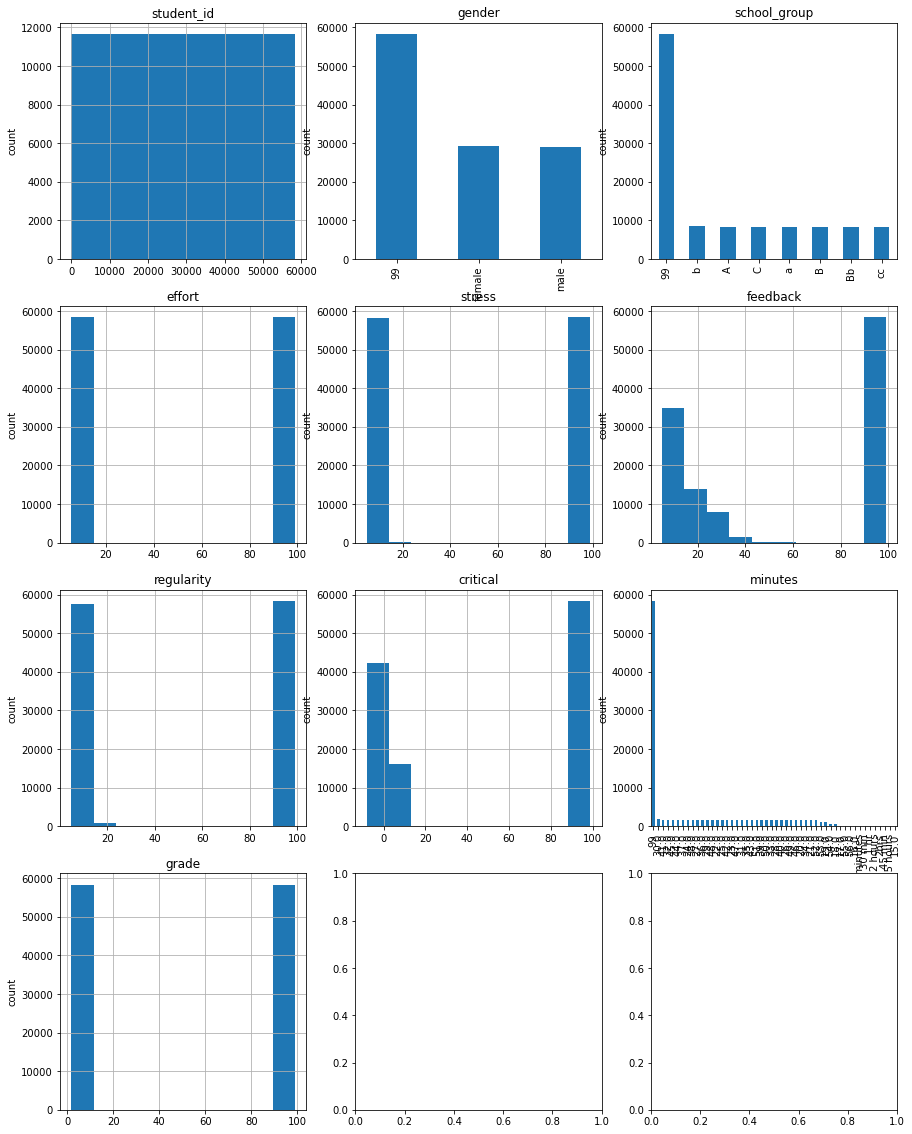

In [8]:
plot_features(df)

### 1.4
Explain your observations. How are the features distributed (poisson, exponential, gaussian, etc)? Can you visually identify outliers? 

In [9]:
# answer = """
# Clearly the plots do not give a good visual representation as there are a lot of rows that belong to value of 99, which clearly indicates the missing values
# """

# send(answer, 14) 

<a id="section2"></a>
## **2 Data Cleaning** 
---

Using your findings from the previous section, carefully continue to explore the data set and do the following:

1. Create a function to handle the missing values
2. Justify your decisions to treat the missing values
3. Create a function to handle the inconsistent data
4. Justify your decisions to treat the inconsistent data


### 2.1
Create a function to handle the missing values

In [10]:
### 2.1
def handle_missing_values(df):
    """
    Identifies and removes all missing values

    Parameters
    ----------
    df : DataFrame
      Containing missing values

    Returns
    -------
    df : DataFrame
      Without missing values

    Hint:
    -----
    Try to understand the pattern in the missing values    
    """
    # YOUR CODE HERE
    # begin
    # the value 99 is used to indicate missing values
    df = df.replace(99, np.nan)
    df = df.replace('99', np.nan)
    # drop the rows with missing values
    # df = df.dropna()
    # replace the missing values with the median for numerical features
    # and the mode for categorical features
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    # end
    return df


In [11]:
df = handle_missing_values(df)
# send(len(df.columns), 21.1)
print("number of columns: ", len(df.columns))

number of columns:  10


In [12]:
print("length of the dataframe: ", len(df))
# send(len(df), 21.2) 
df.head()

length of the dataframe:  116658


,student_id,gender,school_group,effort,stress,feedback,regularity,critical,minutes,grade
0,20404.0,male,b,5.997184,7.692678,24.722538,6.227957,2.017330,20.0,3.60
1,26683.0,female,b,6.017588,8.848776,12.843072,6.227957,1.372255,30.0,3.93
2,32954.0,female,b,6.070632,6.704850,24.448975,7.218109,1.372255,30.0,3.67
3,42595.0,female,b,5.996371,7.401787,12.843072,5.578566,1.026390,21.0,3.60
4,28603.0,male,b,5.985351,6.780604,12.843072,6.227957,1.372255,30.0,2.86


In [13]:
# take a look at the new dataframe stats and compare it with the original
get_feature_stats(df)

,count,mean,std,min,25%,50%,75%,max,missing
student_id,116658.0,29165.498320,16837.773985,1.000000,14584.000000,29165.500000,43747.000000,58329.000000,0.0
effort,116658.0,5.981895,0.034624,5.641724,5.985351,5.985351,5.985351,6.096600,0.0
stress,116658.0,7.487388,1.101443,4.801122,7.401787,7.401787,7.401787,16.399911,0.0
feedback,116658.0,14.168593,5.349964,5.087615,12.843072,12.843072,12.843072,70.393180,0.0
regularity,116658.0,6.543833,1.566467,4.824636,6.227957,6.227957,6.227957,58.383807,0.0
critical,116658.0,1.351269,1.417915,-8.115445,1.372255,1.372255,1.372255,8.960595,0.0
grade,116658.0,3.568639,0.324297,1.760000,3.600000,3.600000,3.600000,6.550000,0.0


### 2.2 
Justify your decisions to treat the missing values. Are there missing values? If so, how are the missing values encoded? Why are there missing values? Is there a pattern in the values missing?


In [ ]:
# answer = """
# YOUR ANSWER HERE
# """

# send(answer, 22) 

### 2.3 
Create a function to handle the inconsistent data

In [14]:
df.head(10)

,student_id,gender,school_group,effort,stress,feedback,regularity,critical,minutes,grade
0,20404.0,male,b,5.997184,7.692678,24.722538,6.227957,2.017330,20.0,3.60
1,26683.0,female,b,6.017588,8.848776,12.843072,6.227957,1.372255,30.0,3.93
2,32954.0,female,b,6.070632,6.704850,24.448975,7.218109,1.372255,30.0,3.67
3,42595.0,female,b,5.996371,7.401787,12.843072,5.578566,1.026390,21.0,3.60
4,28603.0,male,b,5.985351,6.780604,12.843072,6.227957,1.372255,30.0,2.86
5,49776.0,female,b,5.985351,7.401787,12.843072,6.152226,1.372255,30.0,3.60
6,920.0,male,cc,6.010244,7.401787,12.843072,6.725835,1.372255,35.0,3.95
7,12396.0,male,b,6.010841,7.401787,12.843072,6.227957,2.562570,31.0,3.60
8,58232.0,male,b,5.985351,8.098402,12.843072,6.971455,1.372255,28.0,3.26
9,34462.0,female,b,6.029736,5.850793,12.803391,6.227957,1.372255,30.0,3.78


In [ ]:
### 2.3
def handle_inconsistent_data(df):
    """
    Identifies features with inconsistent data types and transforms features
    to the correct data type (numerical, object). 

    Parameters
    ----------
    df : DataFrame
      Containing inconsistent data

    Returns
    -------
    df : DataFrame
       With consistent data. All columns must be either numerical or categorical

    Hint:
    -----
    Don't forget to convert the features into the correct data type 
    """
    # YOUR CODE HERE

    return df

In [ ]:
df = handle_inconsistent_data(df)
print(len(df))
print(df.head())
print(get_feature_stats(df))

### 2.4 
Justify your decisions to treat the inconsistent data. Were there columns with inconsistent data types? How did you identify them? 
 

In [ ]:
answer = """
YOUR ANSWER HERE
"""

send(answer, 24) 

<a id="section3"></a>
## **3 Visualization** 
---

After cleaning the data, we can try to understand or extract insights from it. To do so, in this last section, you will do the following:
1. Create a function to show the relationship between numerical features.
2. Interpret your findings. What is correlation useful for? What insights can you get from it? 
3. Select an appropriate type of graph to explore the relationship between grade, school group, and any other meaningful feature
4. Interpret your findings. What are some factors that seem to influence the grade of the students? Which features do not seem to affect the outcome?


### 3.1 
Create a function to show the linear correlation between features.

In [ ]:
### 3.1
import seaborn as sns
def plot_correlation(df):
    """
    Builds upper triangular heatmap with pearson correlation between numerical variables

    Instructions
    ------------
    The plot must have:
    - An appropiate title
    - Only upper triangular elements
    - Annotated values of correlation coefficients rounded to three significant 
    figures
    - Negative correlation must be blue and possitive correlation red. 

    Parameters
    ----------
    df : DataFrame with data


    """
    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
send(plot_correlation(df), 31) 

### 3.2
Interpret your findings. What is correlation useful for? What insights can you get from it? 


In [ ]:
answer = """
YOUR ANSWER HERE
"""

send(answer, 32) 

### 3.3
Select an appropriate type of graph to explore the relationship between grade, school group, and any other meaningful feature.


In [ ]:
### 3.3
def plot_grades(df):
    """
    Visualizes the relationship between grade,  school group and other meaningful
    feature

    Parameters
    ----------
    df : DataFrame with data

    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
send(plot_grades(df), 33)

### 3.4
Interpret your findings. What are some factors that seem to influence the grade of the students? Which features do not seem to affect the outcome?

In [ ]:
answer = """
YOUR ANSWER HERE
"""

send(answer, 34) 